Import the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

Load the dataset

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_test.shape

(10000, 28, 28)

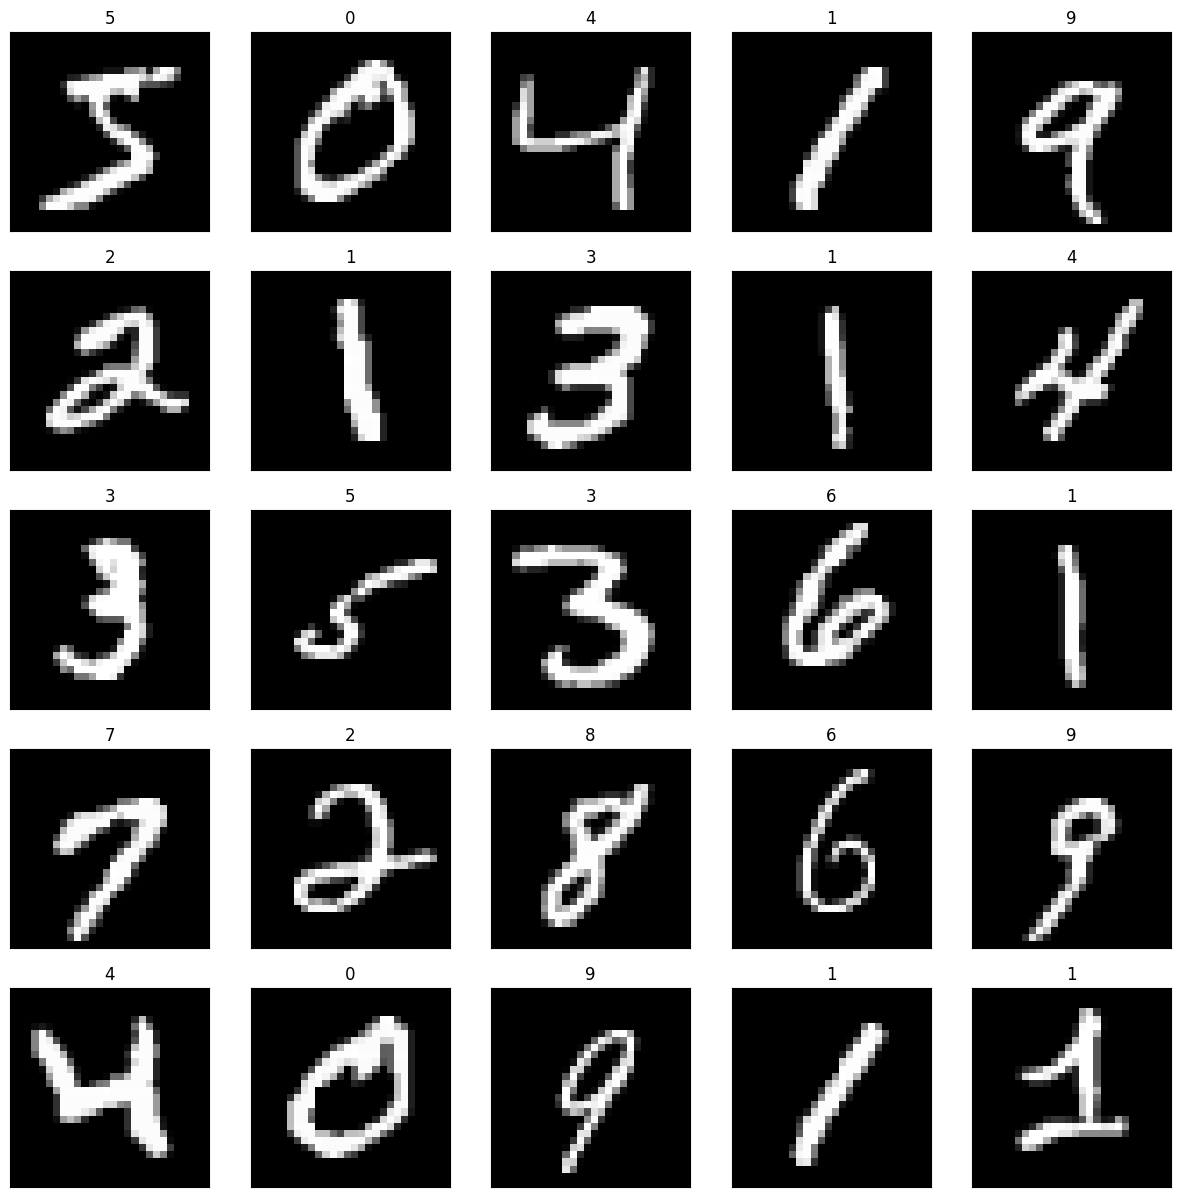

In [16]:
plt.figure(figsize=(15, 15))
for i in range(25):
    
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
        
        

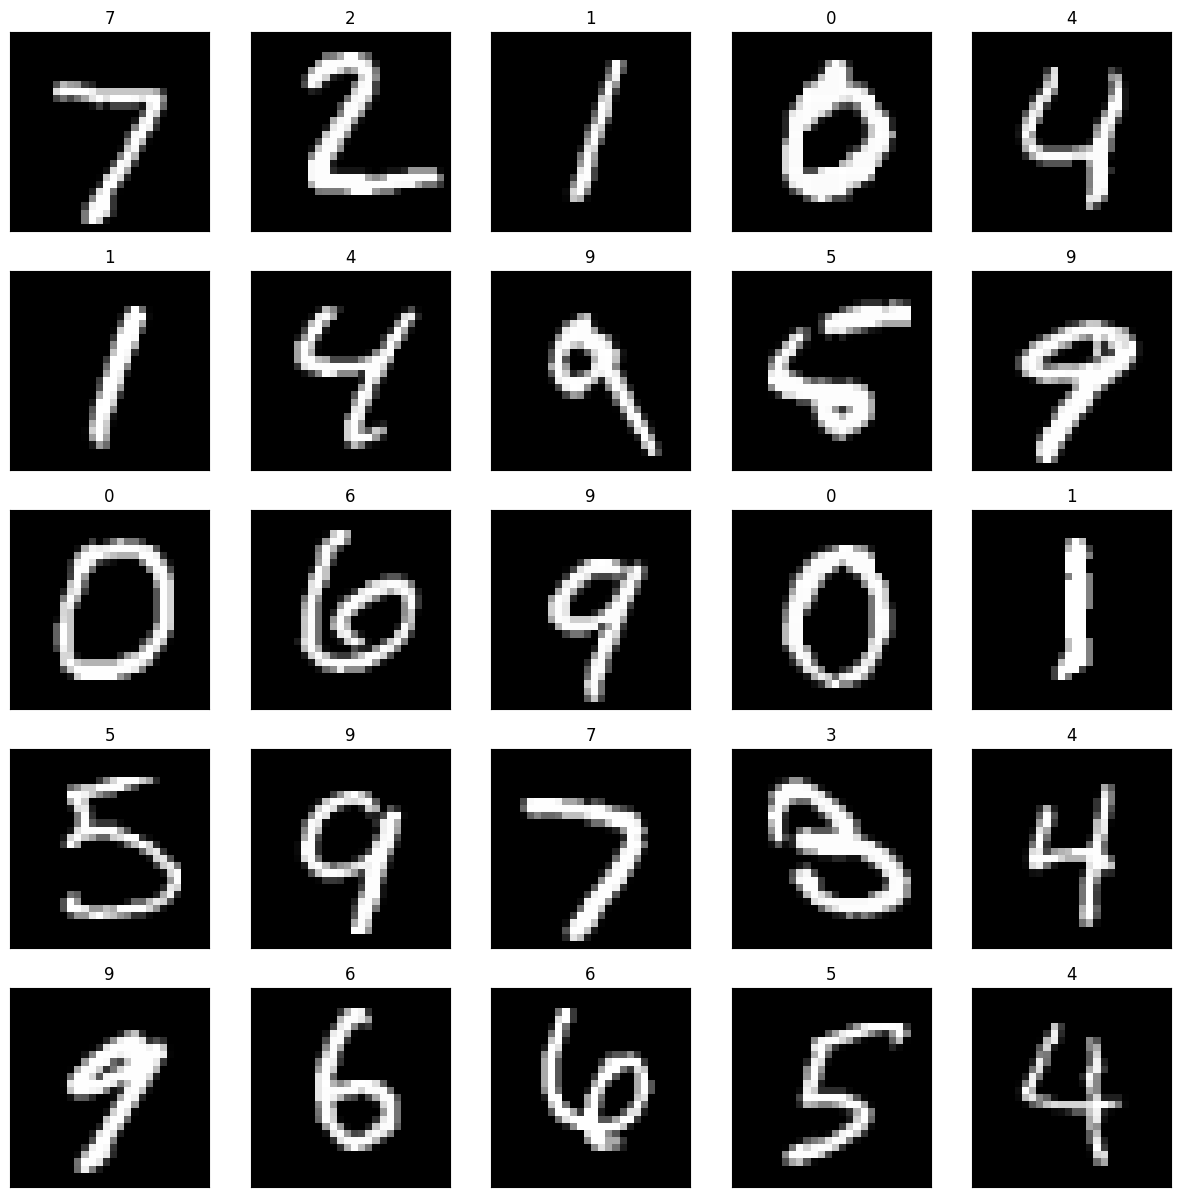

In [17]:
plt.figure(figsize=(15, 15))
for i in range(25):
    
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap = 'gray')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])
        
        

Data Preparation

In [18]:
# normalize

In [19]:
x_train = x_train/255
x_test = x_test/255

Convert 2D to 1D

In [20]:
x_train[0].shape

(28, 28)

In [27]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Prepare the output variable

In [28]:
import seaborn as sns

<Axes: xlabel='count'>

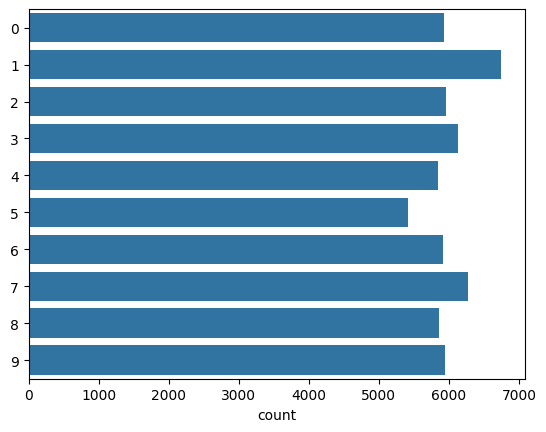

In [29]:
sns.countplot(y=y_train)

In [30]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [31]:
y_train_new.shape

(60000, 10)

In [32]:
y_test_new.shape

(10000, 10)

Build the model

In [33]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [35]:
model = Sequential()

# input layer
model.add(Input(shape=(28,28,1)))
model.add(Dense(512, activation='relu'))

#convolution and pooling layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# Hidden Layers
model.add(Dense(256, activation = 'relu'))

# Hidden Layers
model.add(Dense(128, activation = 'relu'))

# output layers
model.add(Dense(10, activation = 'softmax'))

In [36]:
from tensorflow.keras.utils import plot_model

In [38]:
plot_model(model, show_layer_activations=True, show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 28, 28, 512)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         102,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289,978 (1.11 MB)

 Trainable params: 289,978 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [40]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

Train the model

In [55]:
history = model.fit(x_train, y_train, epochs = 10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 189s 31ms/step - accuracy: 0.9968 - loss: 0.0121
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 188s 31ms/step - accuracy: 0.9979 - loss: 0.0069
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 191s 32ms/step - accuracy: 0.9974 - loss: 0.0083
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 187s 31ms/step - accuracy: 0.9979 - loss: 0.0082
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 187s 31ms/step - accuracy: 0.9979 - loss: 0.0072
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 187s 31ms/step - accuracy: 0.9977 - loss: 0.0084
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 189s 32ms/step - accuracy: 0.9972 - loss: 0.0102
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 189s 31ms/step - accuracy: 0.9975 - loss: 0.0090
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 190s 32ms/step - accuracy: 0.9979 - loss: 0.0086
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 188s 31ms/step - accuracy: 0.9979 - loss: 0.0081


Evaluate the model

In [42]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.9873 - loss: 0.0557


[0.048833053559064865, 0.989300012588501]

In [47]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

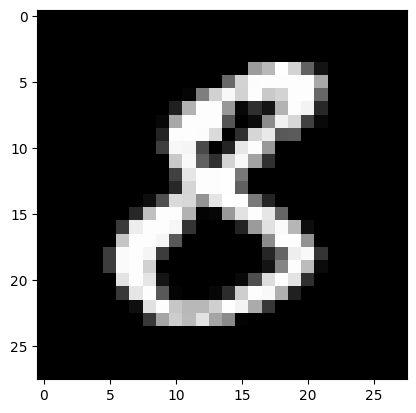

In [48]:
new = x_te[1234]
plt.imshow(new, cmap='gray')

In [49]:
new = new / 255

In [50]:
probs = model.predict(new, verbose=False)
print(probs.argmax())

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
  • training=False
  • mask=None

In [ ]:
import cv2
img = cv2.imread('new-char.png', 0)
img

In [ ]:
img.shape

In [89]:
img_new = cv2.resize(img, (28,28))

In [90]:
img.shape

(260, 269)

In [91]:
new = img_new.reshape(1,28,28)
new = new / 255

In [92]:
probs = model.predict(new, verbose=False)
print(probs.argmax())

2


In [101]:
img = cv2.imread('new-char1.jpg', 0)
img

array([[191, 191, 191, ..., 187, 186, 183],
       [191, 191, 191, ..., 185, 183, 183],
       [191, 191, 191, ..., 183, 181, 183],
       ...,
       [191, 191, 191, ..., 182, 182, 183],
       [191, 191, 191, ..., 182, 182, 183],
       [191, 191, 191, ..., 182, 182, 182]], dtype=uint8)

In [102]:
img.shape

(1031, 1001)

In [103]:
img_new = cv2.resize(img, (28,28))

In [104]:
new = img_new.reshape(1,784)
new = new / 255

In [105]:
probs = model.predict(new, verbose=False)
print(probs.argmax())

5


In [116]:
img = cv2.imread('new-char1.jpg', 0)
# img_new = cv2.resize(img, (28,28))
# img_new = cv2.resize(img, (28,28))
thresh, thresholding = cv2.threshold(img, 1, 784, cv2.THRESH_BINARY)

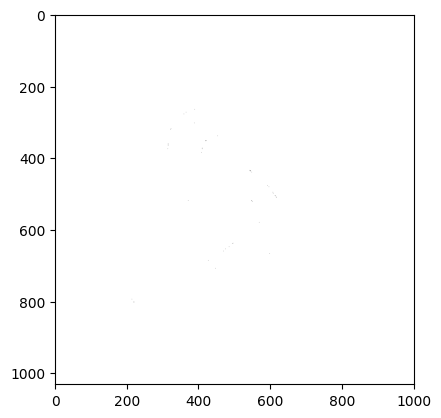

In [117]:
plt.imshow(thresholding, cmap='gray')